In [1]:
import time
import numpy as np
import pandas as pd
import warnings
import glob

import matplotlib.pyplot as plt
import sys
from mpl_toolkits.axes_grid1 import host_subplot

from polychrom.polymer_analyses import slope_contact_scaling
from scipy.ndimage import gaussian_filter1d


In [3]:
file = pd.read_csv('../../../data/fripscore_sep_100.csv')
file
file_300 = pd.read_csv('../../../data/fripscore_sep_300.csv')
file = file[file[' clife']!=500000]
lifetime = file['lifetime']
velocity = file[' velocity']
clife = file[' clife']
cof = file[' cof']

unique_life = np.unique(lifetime)
unique_vel = np.unique(velocity)
unique_clife = np.unique(clife)
unique_cof = np.unique(cof)


### FRiP as a function of ctcf binding time

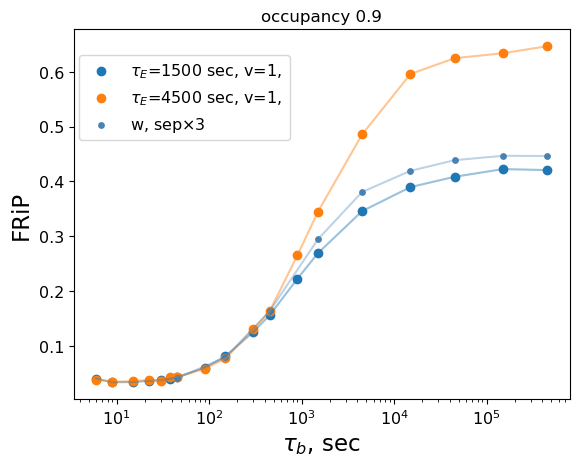

In [4]:
lifes, vels = [500, 1500] , [1]

def smooth(x, sigma = 1.75):
        return gaussian_filter1d(x, sigma)
conversion_cons = 3
for life in lifes:
    for vel in vels:
        if (life==1500 and vel==3): continue
        new_file = file[(lifetime == life)&(velocity == vel)&(clife == 10*cof)][[' clife',' cof', ' fripscore']]
        new_file_filtered = new_file.drop_duplicates(keep = 'first')
        new_file_filtered = new_file_filtered.sort_values(' clife')
        new_file_filtered[' clife']=new_file_filtered[' clife']*conversion_cons
        new_clife = new_file_filtered[' clife']
        #file_300[' clife']= file_300[' clife']*conversion_cons
        #file_300[' cof']= file_300[' cof']*conversion_cons
        new_clife_300 = file_300[' clife']
        frip_score = new_file_filtered[' fripscore']
        frip_score_300 = file_300[' fripscore']
        plt.scatter(new_clife[1:], frip_score[1:], label=r'$\tau_E$=%s sec, v=%s, '%(life*conversion_cons,vel))
        plt.plot(new_clife[1:], frip_score[1:], alpha = 0.45)

clife_300 = file_300[' clife']
cof_300 = file_300[' cof']
file_300 = file_300[(clife_300 == 10*cof_300)]
file_300 = file_300.sort_values(' clife')
file_300[' clife']=file_300[' clife']*conversion_cons
plt.scatter(file_300[' clife'][:9],file_300[' fripscore'][:9],color='steelblue',s=15,label=r'w, sep$\times$3')
plt.plot(file_300[' clife'][:9],file_300[' fripscore'][:9],color='steelblue', alpha = 0.35)
life_w = 500
delta = 350
#plt.plot([life_w, life_w, life_w],[0,0.5,0.71],'--', color = 'red',alpha = 0.75, linewidth = 0.75, label = r'$\tau$=$\tau^W_E$')
#plt.plot([life_w-delta, life_w-delta, life_w-delta],[0,0.5,0.71],'--', color = 'blue',
#         alpha = 0.75, linewidth = 0.75, label = r'$\tau$$\sim$$\tau^W_E-\delta$')
        #plt.ylim(0,0.5)
plt.xlim()
plt.title('occupancy 0.9')
plt.xscale('log')
plt.xticks(fontsize=11.5)
plt.yticks(fontsize=11.5)
plt.legend(fontsize = 11.51,loc = (0.01,0.7))
plt.ylabel('FRiP',fontsize = 16.5)
plt.xlabel(r'$\tau_b$, sec', fontsize = 16.5)
plt.savefig('../../../images/frip_for_tau_extruder_params.pdf')
plt.show()
        

In [5]:
# adding a column for occupancy in data frame as a funciton of binding and unbinding time
file[' occupancy']=file[' clife']/(file[' cof']+file[' clife'])
file[' occupancy'] = file[' occupancy'].round(2)
file

,lifetime,velocity,clife,cof,sep,fripscore,occupancy
0,500.0,1,1.0,0.10,100,0.446104,0.91
1,500.0,1,1.0,0.20,100,0.026424,0.83
2,500.0,1,1.0,0.30,100,0.018047,0.77
3,500.0,1,1.0,0.50,100,0.013457,0.67
4,500.0,1,1.0,0.75,100,0.012778,0.57
...,...,...,...,...,...,...,...
1099,500.0,3,7.5,15.00,100,0.021341,0.33
1100,500.0,3,7.5,150.00,100,0.015836,0.05
1101,500.0,3,7.5,3.00,100,0.040676,0.71
1102,500.0,3,7.5,30.00,100,0.014962,0.20


In [6]:
list_occup = np.unique(file[' occupancy'])

In [7]:
# defining colors as cividis 
num_plot =5
viridis_cmap = plt.get_cmap('cividis')

# Generate an array of values from 0 to 1 to map to colors in the colormap
values = np.linspace(0, 1, num_plot)

# Get the corresponding colors from the colormap
colors = viridis_cmap(values)
colors=list(colors)
colors.reverse()

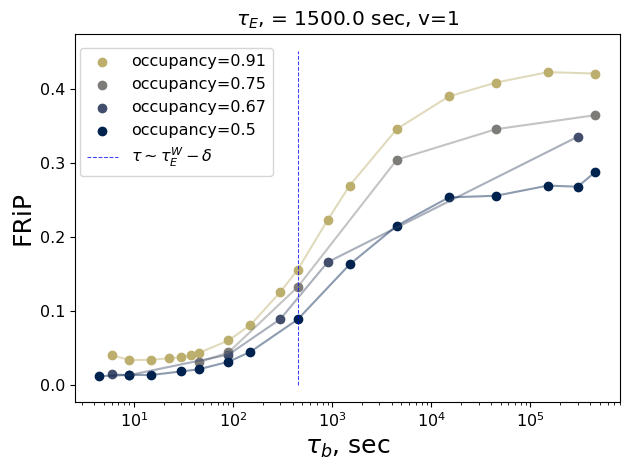

In [8]:
lifes, vels = [500] , [1]

occupancy=file[' occupancy']
list_occup = [ 0.91, 0.75, 0.67, 0.5, ]
convertor = 25*60/500
#list_occup=[0.67]
i=1
for life in lifes:
    for vel in vels:
        for occup in list_occup:
            if (life==1500 and vel==3): continue
            new_file = file[(lifetime == life)&(velocity == vel)&(occupancy==occup)][[' clife',' cof', ' fripscore']]
            #print(new_file)
            new_file_filtered = new_file.drop_duplicates(keep = 'first')
            new_file_filtered = new_file_filtered.sort_values(' clife')
            new_clife = new_file_filtered[' clife']
            new_clife_300 = file_300[' clife']
            frip_score = new_file_filtered[' fripscore']
            frip_score_300 = file_300[' fripscore']
            plt.scatter(new_clife[1:]*convertor, frip_score[1:], color=colors[i],label=r'occupancy=%s'%(occup))
            plt.plot(new_clife[1:]*convertor, frip_score[1:], color=colors[i],alpha = 0.45)
            i+=1

clife_300 = file_300[' clife']
cof_300 = file_300[' cof']
file_300 = file_300[(clife_300 == 10*cof_300)]
file_300 = file_300.sort_values(' clife')
#plt.scatter(file_300[' clife'][:9],file_300[' fripscore'][:9],color='steelblue',s=15,label=r'W, sep=300')
#plt.plot(file_300[' clife'][:9],file_300[' fripscore'][:9],color='steelblue', alpha = 0.35)
life_w = 500*convertor
delta = 350*convertor
#plt.plot([life_w, life_w, life_w],[0,0.5,0.71],'--', color = 'red',alpha = 0.75, linewidth = 0.75, label = r'$\tau$=$\tau^W_E$')
plt.plot([life_w-delta, life_w-delta, life_w-delta],[0,0.3,0.451],'--', color = 'blue',
         alpha = 0.75, linewidth = 0.75, label = r'$\tau$$\sim$$\tau^W_E-\delta$')
        #plt.ylim(0,0.5)
plt.xlim()
plt.title(r'$\tau_E$, = %s sec, v=1'%(life*convertor),fontsize=14.5)
plt.xscale('log')
plt.xticks(fontsize=11.5)
plt.yticks(fontsize=11.5)
plt.legend(fontsize = 11.51,loc = (0.01,0.615))
plt.ylabel('FRiP',fontsize = 18)
plt.xlabel(r'$\tau_b$, sec', fontsize = 18)
plt.tight_layout()
#plt.savefig('../../images/frip_for_tau.pdf',transparent=True)

plt.show()
        

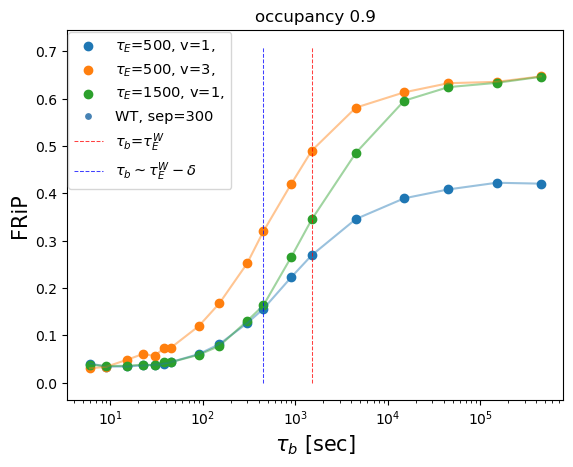

In [9]:
lifes, vels = [500, 1500] , [1, 3]

convertor = 25*60/500
for life in lifes:
    for vel in vels:
        if (life==1500 and vel==3): continue
        new_file = file[(lifetime == life)&(velocity == vel)&(clife == 10*cof)][[' clife',' cof', ' fripscore']]
        new_file_filtered = new_file.drop_duplicates(keep = 'first')
        new_file_filtered = new_file_filtered.sort_values(' clife')
        new_clife = new_file_filtered[' clife']
        new_clife_300 = file_300[' clife']
        frip_score = new_file_filtered[' fripscore']
        frip_score_300 = file_300[' fripscore']
        plt.scatter(new_clife[1:]*convertor, frip_score[1:], label=r'$\tau_E$=%s, v=%s, '%(life,vel))
        plt.plot(new_clife[1:]*convertor, frip_score[1:], alpha = 0.45)

clife_300 = file_300[' clife']
cof_300 = file_300[' cof']
file_300 = file_300[(clife_300 == 10*cof_300)]
file_300 = file_300.sort_values(' clife')
plt.scatter(file_300[' clife'][:9]*convertor,file_300[' fripscore'][:9],color='steelblue',s=15,label=r'WT, sep=300')
plt.plot(file_300[' clife'][:9]*convertor,file_300[' fripscore'][:9],color='steelblue', alpha = 0.35)
life_w = 500*convertor
delta = 350*convertor
plt.plot([life_w, life_w, life_w],[0,0.5,0.71],'--', color = 'red',alpha = 0.75, linewidth = 0.75, label = r'$\tau_b$=$\tau^W_E$')
plt.plot([life_w-delta, life_w-delta, life_w-delta],[0,0.5,0.71],'--', color = 'blue',
         alpha = 0.75, linewidth = 0.75, label = r'$\tau_b$$\sim$$\tau^W_E-\delta$')
        #plt.ylim(0,0.5)
plt.xlim()
plt.title('occupancy 0.9')
plt.xscale('log')
plt.legend(fontsize = 10.51,loc = (0.001,0.57))
plt.ylabel('FRiP',fontsize = 15)
plt.xlabel(r'$\tau_b$ [sec]', fontsize = 15)
#plt.savefig('../../images/frip_for_tau_extruder_params.pdf',bbox_inches='tight')
plt.show()
        

/home1/rahmanin/.conda/envs/openmm-env/lib/python3.7/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home1/rahmanin/.conda/envs/openmm-env/lib/python3.7/site-packages/numpy/lib/function_base.py:1292: RuntimeWarning: invalid value encountered in subtract
  a = op(a[slice1], a[slice2])
/home1/rahmanin/start/polychrom/polychrom/polychrom/polymer_analyses.py:207: RuntimeWarning: divide by zero encountered in log
  slope = np.diff(smooth(np.log(cp))) / np.diff(smooth(np.log(mids)))


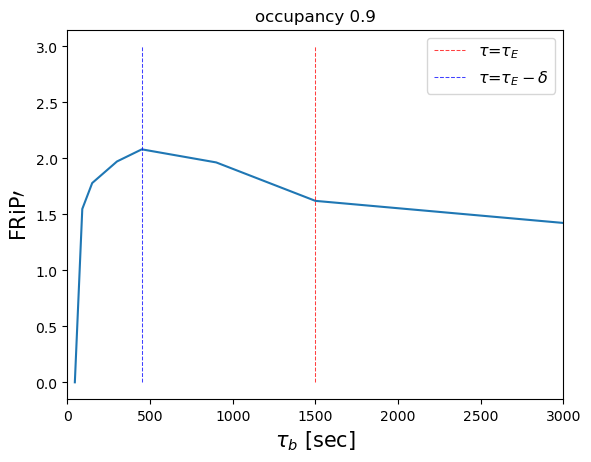

In [10]:
life, vel = 500 , 1

life_range=[500]
vel_range=[1]
for life in life_range:
    for vel in vel_range:
        new_file = file[(lifetime == life)&(velocity == vel)&(clife == 10*cof)][[' clife',' cof', ' fripscore']]
        new_file_filtered = new_file.drop_duplicates(keep = 'first')
        new_file_filtered = new_file_filtered.sort_values(' clife')
        new_clife = new_file_filtered[' clife']
        frip_score = new_file_filtered[' fripscore']
        s, der = slope_contact_scaling(np.log(new_clife), smooth(frip_score), sigma=1.5)
        sp, derp = slope_contact_scaling(s, der, sigma=1.5)
        plt.plot(np.exp(s)*convertor, der)
        delta = 350
        life=life*convertor
        delta=delta*convertor
        plt.plot([life, life, life],[0,0.5,3],'--', color = 'red',alpha = 0.75, linewidth = 0.75, label = r'$\tau$=$\tau_E$')
        plt.plot([life-delta, life-delta, life-delta],[0,0.5,3],'--', color = 'blue',alpha = 0.75, linewidth = 0.75, label = r'$\tau$=$\tau_E-\delta$')
        #plt.xscale('log')
        #plt.ylim(0.5,1.5)
        plt.xlim(0, 1000*convertor)
        plt.title('occupancy 0.9')
        plt.legend(fontsize = 11.5)
        plt.ylabel('FRiP$\prime$',fontsize = 15)
        plt.xlabel(r'$\tau_b$ [sec]', fontsize = 15)
        #plt.savefig('../../images/dfrip_for_dtaub_life_%s_vel_%s.pdf'%(life/convertor,vel))
        
        plt.show()

In [11]:
num_plot = 11
viridis_cmap = plt.get_cmap('cividis')

# Generate an array of values from 0 to 1 to map to colors in the colormap
values = np.linspace(0, 1, num_plot)

# Get the corresponding colors from the colormap
colors = viridis_cmap(values)

### FRiP as a function of occupancy rates for different unbinding times

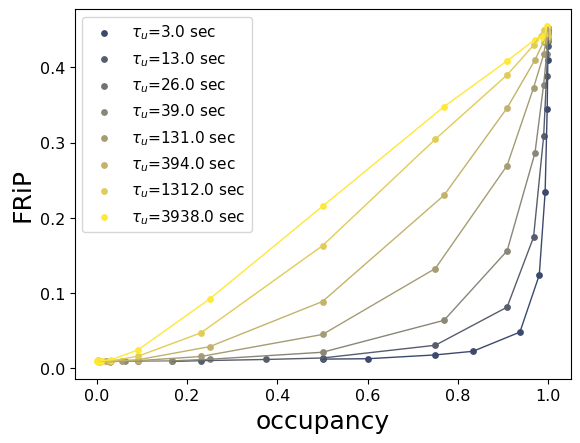

In [17]:
lifes, vels = [500] , [1]


i=1
num_plot = 10
viridis_cmap = plt.get_cmap('cividis')

# Generate an array of values from 0 to 1 to map to colors in the colormap
values = np.linspace(0, 1, num_plot)

# Get the corresponding colors from the colormap
colors = viridis_cmap(values)
convertor = 21.875*60/500
file = pd.read_csv('../../../data/fripscore_for_equilibrated.csv')
file = file[file[' separation']==100]
lifetime = file['lifetime']
velocity = file[' velocity']
clife = file[' clife']
cof = file[' cof']
unique_life = np.unique(lifetime)
unique_vel = np.unique(velocity)
unique_clife = np.unique(clife)
unique_cof = np.unique(cof)
cof_val = 10
list_cof =[ 1, 5,10, 15, 50, 150, 500,1500]
for cof_val in list_cof:
    for life in lifes:
        for vel in vels:
            i+=1
            new_file = file[(lifetime == life)&(velocity == vel)&(cof==cof_val)][[' clife',' cof', ' fripscore']]
            new_file_filtered = new_file.drop_duplicates(keep = 'first')
            new_file_filtered = new_file_filtered.sort_values(' clife')
            new_clife = new_file_filtered[' clife']
            frip_score = new_file_filtered[' fripscore']
            plt.scatter(new_clife/(new_clife+cof_val), frip_score, label = r'$\tau_u$=%s sec'%(np.round(cof_val*convertor)),linewidth=1,s=15, color = colors[i])
            plt.plot(new_clife/(new_clife+cof_val), frip_score, linewidth=1, color = colors[i])


lifes, vels = [500] , [1]
file = pd.read_csv('../../../data/fripscore_static.csv')
frip_score = file[' fripscore']
lifetime = file['lifetime']
velocity = file[' velocity']
clife = file[' clife']
cof = file[' cof']
face = file[' face']
cof_val = 1
clife_val = 10
for life in lifes:
    for vel in vels:
        new_file_stat = file[(lifetime == life)&(velocity == vel)&(cof==cof_val)&(clife==clife_val)][[' face', ' fripscore']]
        new_file_filtered = new_file_stat.drop_duplicates(keep = 'first')
        new_file_filtered = new_file_filtered.sort_values(' face')
        new_face = new_file_filtered[' face']
        frip_score = new_file_filtered[' fripscore']
        #plt.plot(new_face, frip_score, color='blue',linestyle='--', linewidth =1, label ='static')

lifes, vels = [500] , [1]
file = pd.read_csv('../../../data/fripscore_static_pause_with_number.csv')
file = file[(file['lifetime']==500)&(file[' velocity']==1)&(file[' separation']==100)]
seps = np.unique(file[' face'])
frip_score = file[' fripscore']
lifetime = file['lifetime']
velocity = file[' velocity']
clife = file[' clife']
cof = file[' cof']
face = file[' face']
cof_val = 1
clife_val = 10
for life in lifes:
    for vel in vels:
        new_file_stat = file[[' face', ' fripscore']]
        new_file_filtered = new_file_stat.drop_duplicates(keep = 'first')
        new_file_filtered = new_file_filtered.sort_values(' face')
        new_face = new_file_filtered[' face']
        frip_score = new_file_filtered[' fripscore']
        #plt.plot(new_face, frip_score, color='red',linestyle='--', linewidth =1, label ='static pausing')
#plt.legend(fontsize = 10,loc = (1.015,0.15))
plt.xticks(fontsize=11.5)
plt.yticks(fontsize=11.5)
plt.legend(fontsize=11)

plt.ylabel('FRiP',fontsize = 18)
plt.xlabel(r'occupancy', fontsize = 18)
plt.savefig('../../../images/frip_for_occup_tau_u.pdf',bbox_inches='tight')
plt.show()

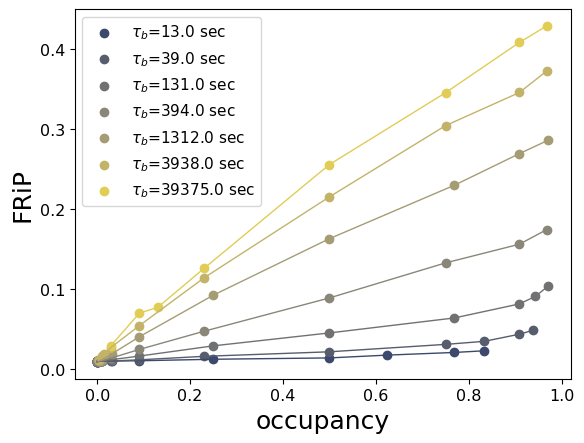

In [19]:
lifes, vels = [500] , [1]


i=1
convertor = 21.875*60/500
file = pd.read_csv('../../../data/fripscore_for_equilibrated.csv')
file = file[file[' separation']==100]
lifetime = file['lifetime']
velocity = file[' velocity']
clife = file[' clife']
cof = file[' cof']
unique_life = np.unique(lifetime)
unique_vel = np.unique(velocity)
unique_clife = np.unique(clife)
unique_cof = np.unique(cof)
cof_val = 10
list_clife =[5, 15, 50,  150, 500, 1500, 15000]
list_cof =[ 1, 10, 15, 50, 150, 500,1500, 5000, 15000]
for clife_val in list_clife:
    for life in lifes:
        for vel in vels:
            i+=1
            new_file = file[(lifetime == life)&(velocity == vel)&(clife==clife_val)][[' clife',' cof', ' fripscore']]
            new_file_filtered = new_file.drop_duplicates(keep = 'first')
            new_file_filtered = new_file_filtered.sort_values(' cof')
            new_file_filtered['occup']=clife/(clife+new_file_filtered[' cof'])
            new_file_filtered = new_file_filtered[new_file_filtered['occup']<=0.98]
            occup = new_file_filtered['occup']
            new_cof = new_file_filtered[' cof']
            frip_score = new_file_filtered[' fripscore']                    
            plt.scatter(occup, frip_score, label = r'$\tau_b$=%s sec'%(np.round(clife_val*convertor)),linewidth=1, color = colors[i])
            plt.plot(occup, frip_score, linewidth=1, color = colors[i])


plt.xticks(fontsize=11.5)
plt.yticks(fontsize=11.5)
plt.legend(fontsize=11)

plt.ylabel('FRiP',fontsize = 18)
plt.xlabel(r'occupancy', fontsize = 18)
plt.savefig('../../../images/frip_for_occup_taub.pdf',bbox_inches='tight')
plt.show()

### loop size vs occupancy for different unbiniding time

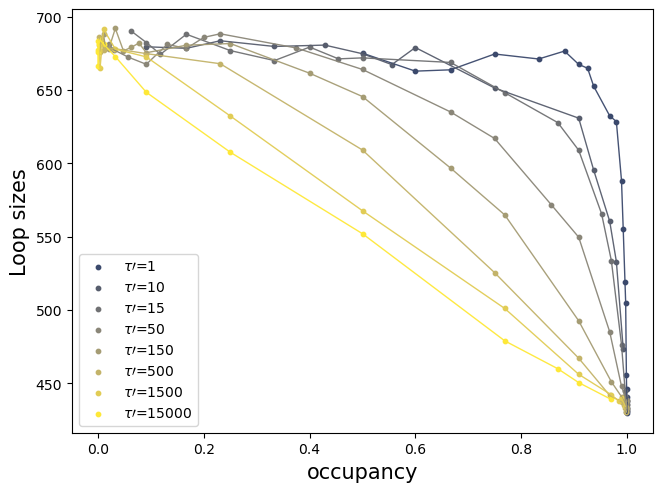

In [13]:
lifes, vels = [500] , [1]


i=1
file = pd.read_csv('../../data/new_loop_sizes_averaged_sep_100.csv')
#print(file)
#file = file[file[' separation']==100]
plt.figure(figsize=(7.5, 5.5))
lifetime = file['life']
velocity = file['vel']
clife = file['clife']
cof = file['cof']
unique_life = np.unique(lifetime)
unique_vel = np.unique(velocity)
unique_clife = np.unique(clife)
unique_cof = np.unique(cof)
cof_val = 10
list_cof =[ 1,  10, 15, 50, 150, 500,1500, 15000]
for cof_val in list_cof:
    for life in lifes:
        for vel in vels:
            i+=1
            new_file = file[(lifetime == life)&(velocity == vel)&(cof==cof_val)][['clife','cof', 'loopmean']]
            new_file_filtered = new_file.drop_duplicates(keep = 'first')
            new_file_filtered = new_file_filtered.sort_values('clife')
            new_clife = new_file_filtered['clife']
            frip_score = new_file_filtered['loopmean']
            plt.scatter(new_clife/(new_clife+cof_val), frip_score, label = r'$\tau\prime$=%s'%cof_val,linewidth=1,s=10, color = colors[i])
            plt.plot(new_clife/(new_clife+cof_val), frip_score, linewidth=1, color = colors[i],alpha = 0.95)


file = pd.read_csv('../../data/loop_sizes_averaged_static_paused.csv')
lifetime = file['life']
velocity = file['vel']
clife = file['clife']
cof = file['cof']
face = file['face']
sep = file['sep']
cof_val = 1
clife_val = 10
for life in lifes:
    for vel in vels:
        new_file_stat = file[(lifetime == life)&(velocity == vel)&(sep == 100)&(cof==cof_val)&(clife==clife_val)][['face', 'loopmean']]
        #new_file_filtered = new_file_stat.drop_duplicates(keep = 'first')
        new_file_filtered = new_file_stat.sort_values('face')
        new_face = new_file_filtered['face']
        frip_score = new_file_filtered['loopmean']
        #plt.plot(new_face, frip_score, '--k', linewidth =1, label ='static paused')
file = pd.read_csv('../../data/loop_sizes_averaged_static.csv')
lifetime = file['life']
velocity = file['vel']
clife = file['clife']
cof = file['cof']
face = file['face']
sep = file['sep']
for life in lifes:
    for vel in vels:
        new_file_stat = file[(lifetime == life)&(velocity == vel)&(sep == 100)&(cof==cof_val)&(clife==clife_val)][['face', 'loopmean']]
        #new_file_filtered = new_file_stat.drop_duplicates(keep = 'first')
        new_file_filtered = new_file_stat.sort_values('face')
        new_face = new_file_filtered['face']
        frip_score = new_file_filtered['loopmean']
        #plt.plot(new_face, frip_score, '-.k', linewidth =1, label ='static')
#plt.legend(fontsize = 10,loc = (1.015,0.15))
plt.legend()
plt.ylabel('Loop sizes',fontsize = 15)
plt.xlabel(r'occupancy', fontsize = 15)
plt.savefig('../../loop_sizes_for_occup_sims.pdf',bbox_inches='tight')
plt.show()


### comparison loop size and frip

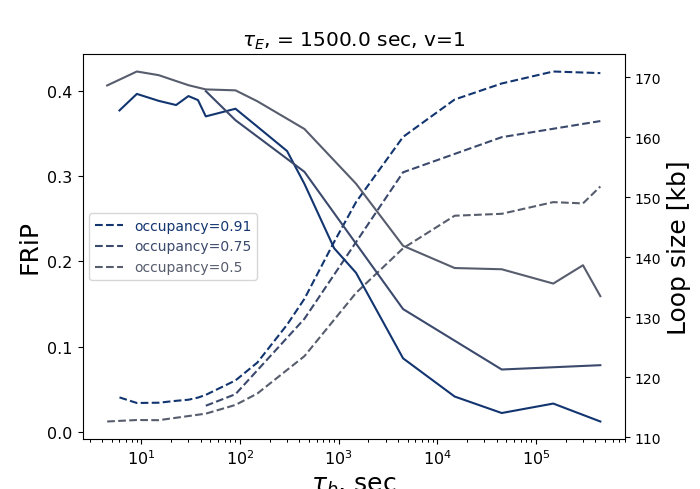

In [15]:
lifes, vels = [500] , [1]

plt.figure(figsize=(7, 5))
host = host_subplot(111)
### data for frip
file_frip = pd.read_csv('../../data/fripscore_sep_100.csv')
file_frip = file_frip[file_frip[' clife']!=500000]
file_frip[' occupancy']=file_frip[' clife']/(file_frip[' cof']+file_frip[' clife'])
file_frip[' occupancy'] = file_frip[' occupancy'].round(2)
lifetime = file_frip['lifetime']
velocity = file_frip[' velocity']
clife = file_frip[' clife']
cof = file_frip[' cof']
occupancy = file_frip[' occupancy']
max_frip = np.max(file_frip[' fripscore'])
unique_life = np.unique(lifetime)
unique_vel = np.unique(velocity)
unique_clife = np.unique(clife)
unique_cof = np.unique(cof)
list_occup = [ 0.91, 0.75,  0.5, ]
convertor = 25*60/500

i=1

for life in lifes:
    for vel in vels:
        for occup in list_occup:
            if (life==1500 and vel==3): continue
            new_file = file_frip[(lifetime == life)&(velocity == vel)&(occupancy==occup)][[' clife',' cof', ' fripscore']]
            new_file_filtered = new_file.drop_duplicates(keep = 'first')
            new_file_filtered = new_file_filtered.sort_values(' clife')
            new_clife = new_file_filtered[' clife']
            frip_score = new_file_filtered[' fripscore']
            #host.scatter(new_clife[1:]*convertor, frip_score[1:], color=colors[i],label=r'occupancy=%s'%(occup))
            frip_plot=host.plot(new_clife[1:]*convertor, frip_score[1:], linestyle='--',color=colors[i],label=r'occupancy=%s'%(occup))
            i+=1
### data for loop size
file_loop = pd.read_csv('../../data/new_loop_sizes_averaged_sep_100.csv')
file_loop = file_loop[file_loop['clife']<500000]
file_loop['occupancy']=file_loop['clife']/(file_loop['clife']+file_loop['cof'])
file_loop['occupancy'] = file_loop['occupancy'].round(2)
file_loop['loopmean']=file_loop['loopmean']*0.25
lifetime = file_loop['life']
velocity = file_loop['vel']
clife = file_loop['clife']
cof = file_loop['cof']
occupancy = file_loop['occupancy']
i=1
max_loop = np.max(file_loop['loopmean'])
par = host.twinx()
for life in lifes:
    for vel in vels:
        for occup in list_occup:
            if (life==1500 and vel==3): continue
            new_file = file_loop[(lifetime == life)&(velocity == vel)&(occupancy==occup)][['clife','cof', 'loopmean']]
            new_file_filtered = new_file.drop_duplicates(keep = 'first')
            new_file_filtered = new_file_filtered.sort_values('clife')
            new_clife = new_file_filtered['clife']
            loop_score = new_file_filtered['loopmean']
            #par.scatter(new_clife[1:]*convertor, loop_score[1:]/max_loop, color=colors[i])
            loop_plot=par.plot(new_clife[1:]*convertor, loop_score[1:], linestyle='-',color=colors[i])
            i+=1


par.set_ylabel("Loop size [kb]", fontsize = 18)
plt.title(r'$\tau_E$, = %s sec, v=1'%(life*convertor),fontsize=14.5)
plt.xscale('log')
plt.xticks(fontsize=11.5)
plt.yticks(fontsize=11.5)
host.legend(labelcolor="linecolor")
#host.yaxis.get_label().set_color(frip_plot.get_color())
#par.yaxis.get_label().set_color(loop_plot.get_color())
#host.legend(fontsize = 11.51,loc = (1,0.615))
plt.ylabel('FRiP',fontsize = 18)
plt.xlabel(r'$\tau_b$, sec', fontsize = 18)
plt.tight_layout()
plt.savefig('../../images/frip_and_loopsize.pdf',transparent=True)

plt.show()
        

In [17]:
file = pd.read_csv('../../data/new_loop_sizes_averaged_sep_100.csv')
file
lifetime = file['life']
velocity = file['vel']
clife = file['clife']
cof = file['cof']
unique_life = np.unique(lifetime)
unique_vel = np.unique(velocity)
unique_clife = np.unique(clife)
unique_cof = np.unique(cof)

In [18]:
file

,life,vel,clife,cof,sep,loopmean,loopstd
0,500.0,1,1.0,0.10,100,435.977182,362.725519
1,500.0,1,1.0,0.20,100,669.032820,611.631267
2,500.0,1,1.0,0.30,100,677.793348,609.739189
3,500.0,1,1.0,0.50,100,676.042670,619.850853
4,500.0,1,1.0,0.75,100,675.985961,611.370540
...,...,...,...,...,...,...,...
373,500.0,1,7.5,15.00,100,670.088421,600.404346
374,500.0,1,7.5,150.00,100,676.700540,602.292616
375,500.0,1,7.5,3.00,100,660.669050,599.467035
376,500.0,1,7.5,30.00,100,666.449623,607.248176


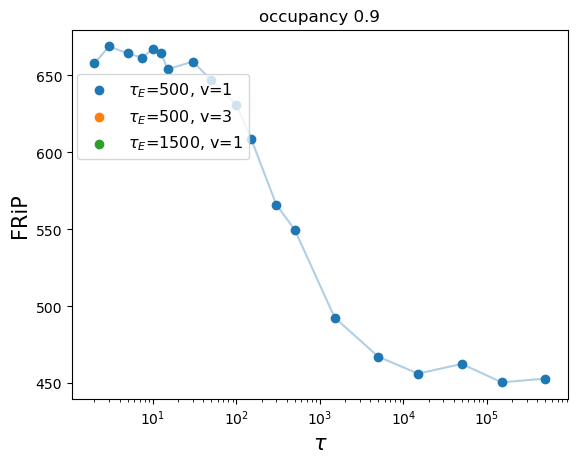

In [19]:
lifes, vels = [500, 1500] , [1, 3]

for life in lifes:
    for vel in vels:
        if (life==1500 and vel==3): continue
        new_file = file[(lifetime == life)&(velocity == vel)&(clife == 10*cof)][['clife','cof', 'loopmean']]
        new_file_filtered = new_file.drop_duplicates(keep = 'first')
        new_file_filtered = new_file_filtered.sort_values('clife')
        new_clife = new_file_filtered['clife']
        frip_score = new_file_filtered['loopmean']
        plt.scatter(new_clife[1:], frip_score[1:], label=r'$\tau_E$=%s, v=%s'%(life,vel))
        plt.plot(new_clife[1:], frip_score[1:], alpha = 0.35)
life_w = 500
#plt.plot([life_w, life_w, life_w],[0,0.5,0.71],'--', color = 'red',alpha = 0.75, linewidth = 0.75, label = r'$\tau$=$\tau^W_E$')
        #plt.ylim(0,0.5)
plt.xlim()
plt.title('occupancy 0.9')
plt.xscale('log')
plt.legend(fontsize = 11.5,loc = (0.01,0.65))
plt.ylabel('FRiP',fontsize = 15)
plt.xlabel(r'$\tau$', fontsize = 15)
plt.savefig('../../frip_for_tau.png')
plt.show()